# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.4.1
xgboost 1.5.2


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-04-12 21:46:30--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 54.230.130.92, 54.230.130.78, 54.230.130.34, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|54.230.130.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115826 (113K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>] 113.11K  --.-KB/s    in 0.04s   

2022-04-12 21:46:30 (3.00 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [115826/115826]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(817, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-07,54900,2346,637,429,676,346,205,694,1171,718,...,311,191,2647,391,397,778,504,563,733,1355
2022-04-08,51867,2216,512,343,605,365,158,642,1305,614,...,340,167,2876,429,392,680,442,612,677,1328
2022-04-09,52647,2274,555,378,567,285,185,654,1505,761,...,312,154,2734,406,389,680,465,609,735,1524
2022-04-10,49053,2145,411,385,573,252,159,530,1454,545,...,278,127,2376,227,389,442,422,493,610,1153
2022-04-11,33105,1551,281,227,326,145,123,395,1220,415,...,150,85,1633,382,192,421,326,329,378,577


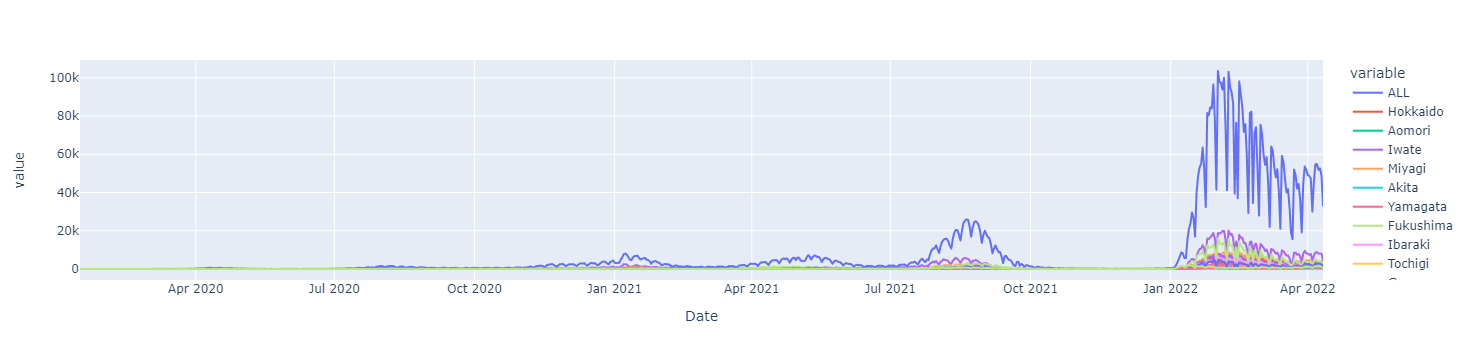

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(117, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-13,48868.857143,1525.714286,439.857143,234.000000,584.000000,191.000000,166.714286,375.142857,1409.714286,442.000000,...,266.000000,172.571429,1735.428571,290.285714,248.571429,631.571429,279.857143,220.857143,333.857143,649.000000
2022-03-20,42623.857143,1446.571429,427.142857,235.285714,513.571429,201.000000,124.571429,341.142857,1434.714286,429.857143,...,234.142857,146.142857,1425.428571,246.571429,205.000000,463.571429,218.285714,224.571429,326.285714,636.428571
2022-03-27,36901.571429,1451.285714,404.428571,202.285714,451.571429,207.428571,82.142857,335.714286,1089.000000,447.714286,...,214.857143,121.428571,1318.571429,205.142857,171.000000,333.857143,238.571429,197.142857,412.571429,723.000000
2022-04-03,44860.000000,1718.000000,436.285714,216.000000,565.142857,261.428571,182.285714,451.857143,1106.428571,616.714286,...,258.571429,134.000000,2066.285714,323.714286,257.714286,481.857143,370.285714,355.285714,682.000000,987.571429
2022-04-10,48409.571429,2073.857143,475.428571,325.285714,588.285714,303.000000,171.000000,573.142857,1282.571429,644.142857,...,293.142857,146.428571,2412.714286,371.571429,352.000000,609.000000,419.714286,515.285714,646.428571,1212.428571


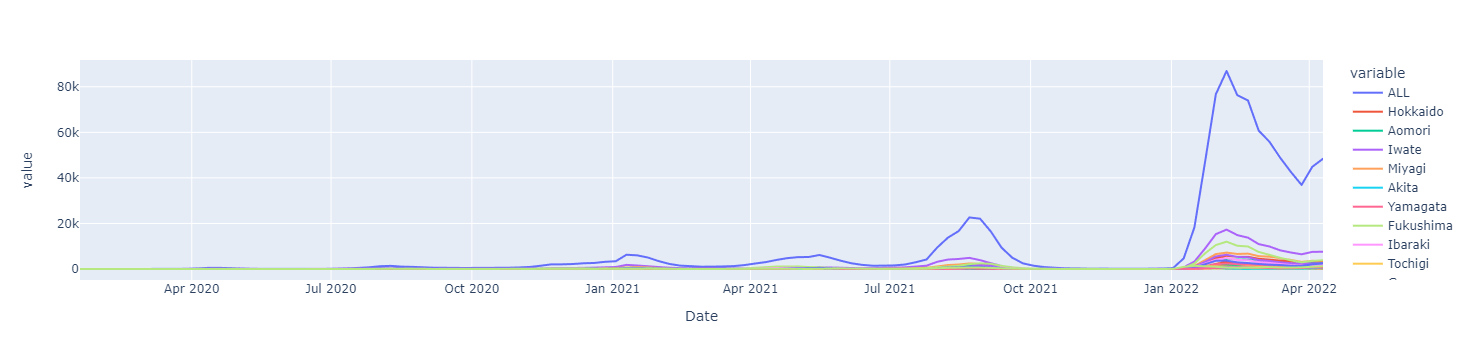

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.000916,0.003135,0.001284,0.000443,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,0.000000,2020.0,6.0,26.0
2020-07-05,0.002089,0.005715,0.003135,0.001284,0.000443,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,0.000002,2020.0,7.0,27.0
2020-07-12,0.003471,0.005698,0.005715,0.003135,0.001284,0.000443,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,0.000010,2020.0,7.0,28.0
2020-07-19,0.005539,0.004367,0.005698,0.005715,0.003135,0.001284,0.000443,0.000521,0.000385,0.000181,0.000124,0.000022,0.000002,2020.0,7.0,29.0
2020-07-26,0.008506,0.002701,0.004367,0.005698,0.005715,0.003135,0.001284,0.000443,0.000521,0.000385,0.000181,0.000124,0.000022,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,NaN,0.562210,0.642729,0.698754,0.851056,0.878121,1.000000,0.882751,0.542835,0.210471,0.053510,0.004444,0.002576,2022.0,6.0,22.0
2022-06-12,NaN,0.490364,0.562210,0.642729,0.698754,0.851056,0.878121,1.000000,0.882751,0.542835,0.210471,0.053510,0.004444,2022.0,6.0,23.0
2022-06-19,NaN,0.424532,0.490364,0.562210,0.642729,0.698754,0.851056,0.878121,1.000000,0.882751,0.542835,0.210471,0.053510,2022.0,6.0,24.0
2022-06-26,NaN,0.516090,0.424532,0.490364,0.562210,0.642729,0.698754,0.851056,0.878121,1.000000,0.882751,0.542835,0.210471,2022.0,6.0,25.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(106, 15) (106,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

In [13]:
df_gr.index[-2]

Timestamp('2022-04-03 00:00:00', freq='W-SUN')

(94, 15) (94,)
CPU times: user 1.1 s, sys: 5.18 ms, total: 1.1 s
Wall time: 157 ms


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



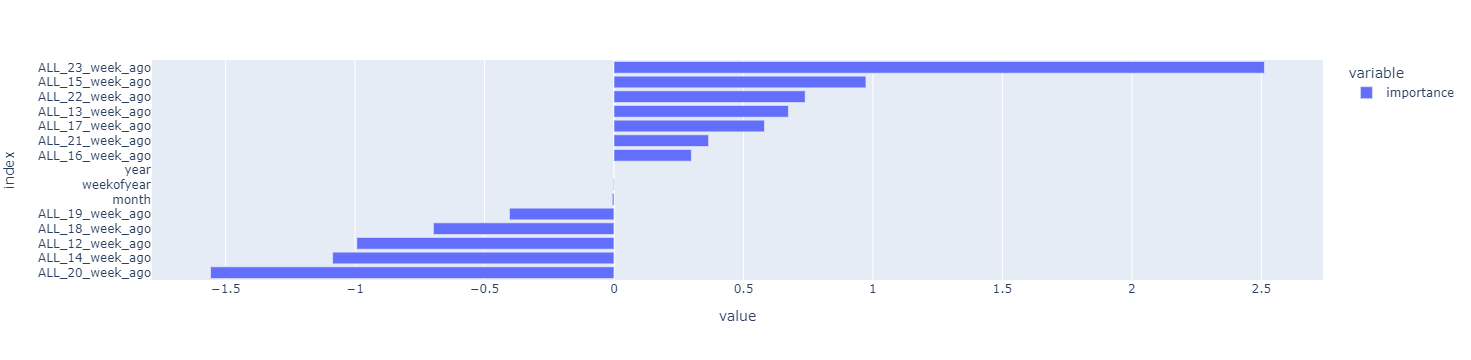

In [14]:
%%time

train_last_date = df_gr.index[-1]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 1.3238e+04


/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/home/eunchong/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



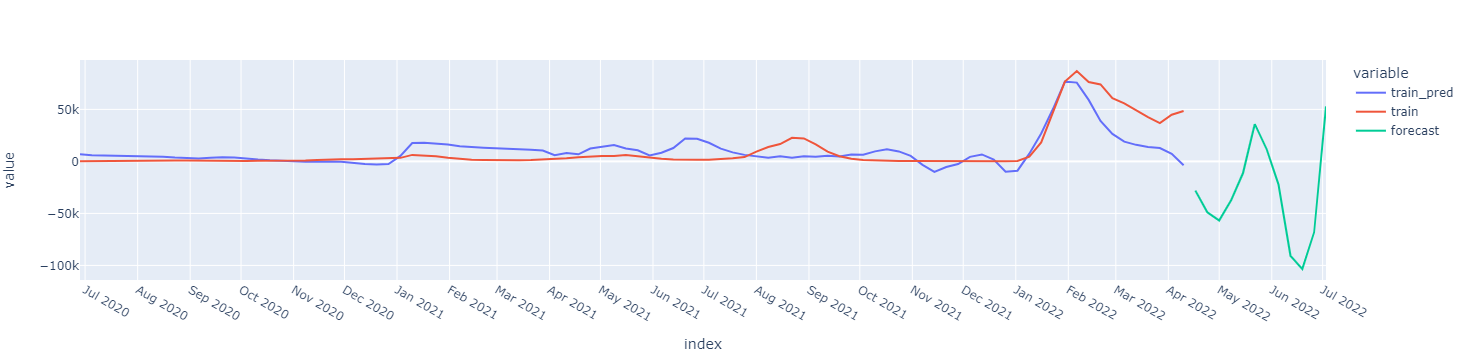

In [15]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_train_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_train_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()